## Fintech545 Assignment5
### October 21, 2022

In [52]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from scipy.optimize import minimize 
from ft545 import myfunctions
from datetime import datetime
from scipy.optimize import fsolve

## 1.Problem 1
Assume you a call and a put option with the following 

-Current Stock Price 165

-Current Date 02/25/2022

-Options Expiration Date 03/18/2022

-Risk Free Rate of 0.25%

-Continuously Compounding Coupon of 0.53%

Calculate the time to maturity using calendar days(not trading days).

For a range of implied volatilities between 10% and 80%, plot the values of the call and the put.

Discuss these graphs. How does the supply and demand affect the implied volatilities?

### Implement the black_scholes algorithm

In [86]:
def d1(S,X,b,sigma,T):
    return (np.log(S/X)+(b+sigma**2/2)*T)/sigma/T**0.5
def d2(S,X,b,sigma,T):
    return d1(S,X,b,sigma,T)-sigma*T**0.5
def bs_call(S,b,r,T,X,sigma):
    return S*np.exp((b-r)*T)*norm.cdf(d1(S,X,b,sigma,T))-X*np.exp(-r*T)*norm.cdf(d2(S,X,b,sigma,T))
def bs_put(S,b,r,T,X,sigma):
    return X*np.exp(-r*T)*norm.cdf(-d2(S,X,b,sigma,T))-S*np.exp((b-r)*T)*norm.cdf(-d1(S,X,b,sigma,T))

### Calculate the time to maturity using calendar days(not trading days).

In [44]:
T = datetime(2022,3,18)-datetime(2022,2,25)
print("the time to maturity is",T.days,"days")
T = T.days/365

the time to maturity is 21 days


Text(0, 0.5, 'call/put values')

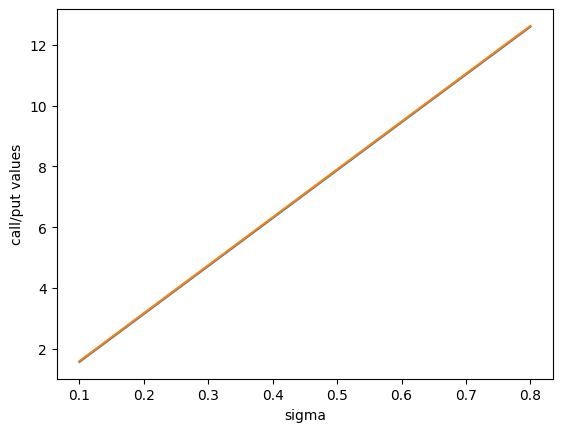

In [50]:
S = 165
X = 165
r = 0.0025
b = r-0.0053
sigmas = np.linspace(0.1,0.8,100)
call = []
put = []
for sigma in sigmas:
    call.append(bs_call(S,b,r,T,X,sigma))
    put.append(bs_put(S,b,r,T,X,sigma))
plt.plot(sigmas,call)
plt.plot(sigmas,put)
plt.xlabel("sigma")
plt.ylabel("call/put values")


The call/put values and the sigma are positively correlated. As sigma increases, the values of call/put also increase. We can also see that the call line and the put line overlap which makes sense because no matter what the volalities is, there is a same probability to go either direction which makes the put/call values being the same with the same volatilities. When there is more demand than supply, the values of an option increase which makes the volatilities increase. On the other hand, when there is more supply than demand, the values of an option decrease which makes volatilities decrease. The volatilities and the values change in the same direction.

### 2. Problem 2
Use the options found in AAPL_Options.csv

-Current AAPL price is 164.85

-Current Date, Risk Free Rate and Divident Rate are the same as problem 1.

Calculate the implied volatility for each option.

Plot the implied volatility vs the strike price for Puts and Calls. Discuss the shape of these graphs. What market dynamics could make these graphs?

There are bonus points available on this question based on your discussion. Take some time to research if needed.

#### get inputs

In [96]:
S = 164.85
T = 21/365
r = 0.0025
q = 0.0053
b = r-q
data = pd.read_csv("AAPL_Options.csv")
data

,Stock,Expiration,Type,Strike,Last Price
0,AAPL,3/18/2022,Call,135.0,30.175
1,AAPL,3/18/2022,Call,140.0,25.300
2,AAPL,3/18/2022,Call,145.0,20.525
3,AAPL,3/18/2022,Call,150.0,15.850
4,AAPL,3/18/2022,Call,155.0,11.525
5,AAPL,3/18/2022,Call,160.0,7.525
6,AAPL,3/18/2022,Call,165.0,4.225
7,AAPL,3/18/2022,Call,170.0,1.935
8,AAPL,3/18/2022,Call,175.0,0.715
9,AAPL,3/18/2022,Call,180.0,0.260


#### Implement the function for implied volatility

In [131]:
def implied_vol_call(S,b,r,T,X,price):
    f1 = lambda z: (bs_call(S,b,r,T,X,z)-price)
    return fsolve(f1, x0 = 0.2)[0]
def implied_vol_put(S,b,r,T,X,price):
    f1 = lambda z: (bs_put(S,b,r,T,X,z)-price)
    return fsolve(f1, x0 = 0.2)[0] 

#### Add a column for implied volatility in the dataframe.

In [111]:
for i in range(len(data)):
    X = data.loc[i,"Strike"]
    price = data.loc[i,"Last Price"]
    if data.loc[i,"Type"]=="Call":
        data.loc[i,"Implied Volatility"] = implied_vol_call(S,b,r,T,X,price)
    else:
        data.loc[i,"Implied Volatility"] = implied_vol_put(S,b,r,T,X,price)
data


,Stock,Expiration,Type,Strike,Last Price,Implied Volatility
0,AAPL,3/18/2022,Call,135.0,30.175,0.499898
1,AAPL,3/18/2022,Call,140.0,25.300,0.452886
2,AAPL,3/18/2022,Call,145.0,20.525,0.412720
3,AAPL,3/18/2022,Call,150.0,15.850,0.369706
4,AAPL,3/18/2022,Call,155.0,11.525,0.340394
5,AAPL,3/18/2022,Call,160.0,7.525,0.304316
6,AAPL,3/18/2022,Call,165.0,4.225,0.273378
7,AAPL,3/18/2022,Call,170.0,1.935,0.249889
8,AAPL,3/18/2022,Call,175.0,0.715,0.235938
9,AAPL,3/18/2022,Call,180.0,0.260,0.237799


#### Draw scatter plots

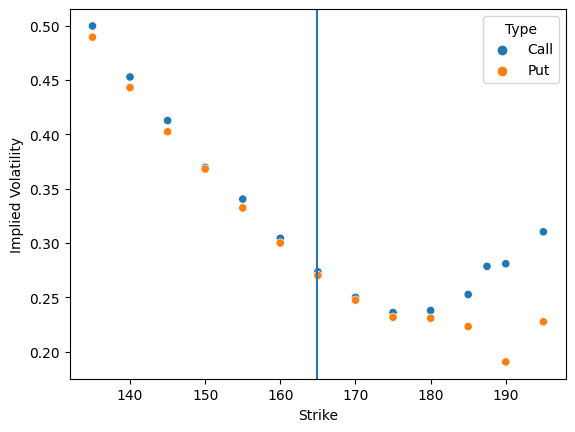

In [114]:
sns.scatterplot(data=data, x="Strike", y="Implied Volatility", hue="Type")
plt.axvline(S)

The market dynamic here is volatility smirk(reverse skew). As this graph shows, at the lower strike price, the implied volatility for calls/puts is higher than that of the higher strike price which means that in-the-money calls and out-of-the-money puts are more expensive compared to out-of-the-money calls and in-the-money puts.

There are two possible reasons for that(after doing some researches). One is that investors are generally worried about market crashes and buy puts for protection. The second reason is that the in-the-money calls have become popular alternatives to outright stock purchases because they have the ability to leverage and results in a greater ROI which causes a greater demand for in-the-money calls and thus, there is a increased implied volatility at the lower strike prices.

The other two popular curves are volatility smile and forward skew. The volatility smile is commonly seen in near-term equity options and options in the forex market. Volatility smiles tell us that the demand is greater for options that are in-the-money or out-of-the-money. For forward skew, the implied volatility for options at the lower strikes are lower than the IV at higher strikes. This suggests that out-of-the-money calls and in-the-money puts are in greater demand compared to in-the-money calls and out-of-the-money puts. The forward skew graph is commonly used for options in the commodities market. When supply is tight, businesses would rather pay more to secure supply than to risk supply disruption.

### 3.Problem 3
Use the portfolios found in problem3.csv

-Current AAPL price is 164.85

-Current Date, Risk Free Rate and Dividend Rate are the same as problem1.

For each of the portfolios, graph the portfolio value over a range of underlying values. Plot the portfolio values and discuss the shapes. Bonus points available for typing these graphs to other topics discussed in the lecture.

Using DailyReturn.csv. Fit a Normal distribution to AAPL returns - assume 0 mean return.Simulate AAPL returns 10 days ahead and apply those returns to the current AAPL price(above). Calculate Mean, VaR and ES. Discuss.

In [174]:
S = 164.85
T = 21/365
r = 0.0025
q = 0.0053
b = r-q
data = pd.read_csv("problem3.csv")
data

,Portfolio,Type,Underlying,Holding,OptionType,ExpirationDate,Strike,CurrentPrice
0,Straddle,Option,AAPL,1,Call,3/18/2022,165.0,4.50
1,Straddle,Option,AAPL,1,Put,3/18/2022,165.0,4.40
2,SynLong,Option,AAPL,1,Call,3/18/2022,165.0,4.50
3,SynLong,Option,AAPL,-1,Put,3/18/2022,165.0,4.40
4,CallSpread,Option,AAPL,1,Call,3/18/2022,165.0,4.50
5,CallSpread,Option,AAPL,-1,Call,3/18/2022,175.0,0.72
6,PutSpread,Option,AAPL,1,Put,3/18/2022,165.0,4.40
7,PutSpread,Option,AAPL,-1,Put,3/18/2022,155.0,1.60
8,Stock,Stock,AAPL,1,NaN,NaN,NaN,164.85
9,Call,Option,AAPL,1,Call,3/18/2022,165.0,4.50


#### Add the implied volatility column 

In [175]:
for i in range(len(data)):
    X = data.loc[i,"Strike"]
    price = data.loc[i,"CurrentPrice"]
    if price!=164.85:
        if data.loc[i,"OptionType"]=="Call":
            data.loc[i,"Implied Volatility"] = implied_vol_call(S,b,r,T,X,price)
        else:
            data.loc[i,"Implied Volatility"] = implied_vol_put(S,b,r,T,X,price)
    else:
        data.loc[i,"Implied Volatility"] = "NaN"
data

,Portfolio,Type,Underlying,Holding,OptionType,ExpirationDate,Strike,CurrentPrice,Implied Volatility
0,Straddle,Option,AAPL,1,Call,3/18/2022,165.0,4.50,0.290819
1,Straddle,Option,AAPL,1,Put,3/18/2022,165.0,4.40,0.273281
2,SynLong,Option,AAPL,1,Call,3/18/2022,165.0,4.50,0.290819
3,SynLong,Option,AAPL,-1,Put,3/18/2022,165.0,4.40,0.273281
4,CallSpread,Option,AAPL,1,Call,3/18/2022,165.0,4.50,0.290819
5,CallSpread,Option,AAPL,-1,Call,3/18/2022,175.0,0.72,0.236476
6,PutSpread,Option,AAPL,1,Put,3/18/2022,165.0,4.40,0.273281
7,PutSpread,Option,AAPL,-1,Put,3/18/2022,155.0,1.60,0.33138
8,Stock,Stock,AAPL,1,NaN,NaN,NaN,164.85,NaN
9,Call,Option,AAPL,1,Call,3/18/2022,165.0,4.50,0.290819


#### Draw a graph for each portfolios

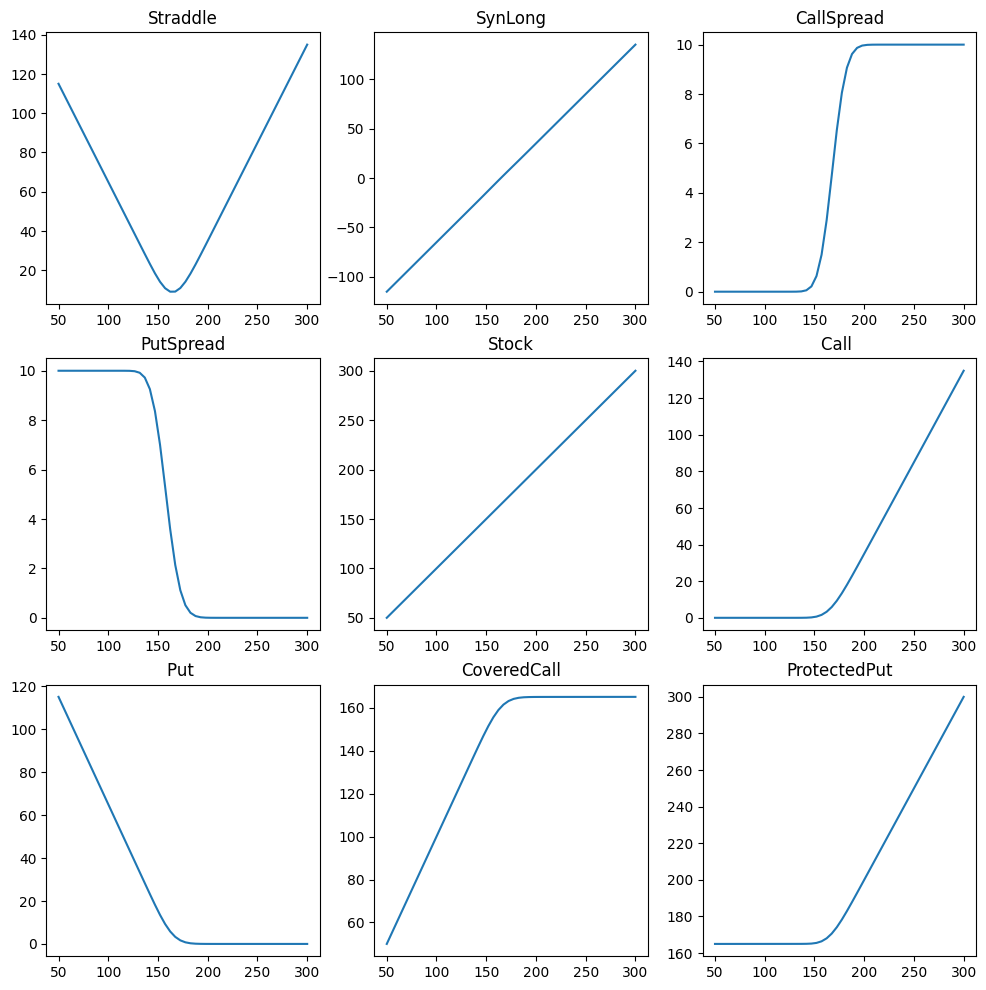

In [176]:
Ss = np.linspace(50,300,50)
Portfolios = ["Straddle", "SynLong", "CallSpread", "PutSpread", "Stock", "Call ", "Put ", "CoveredCall", "ProtectedPut"]
values = {}
for j in range(len(Ss)):
    S = Ss[j]
    for i in range(len(data)):
        name = data.loc[i,"Portfolio"]
        X = data.loc[i,"Strike"]
        sigma = data.loc[i,"Implied Volatility"]
        if data.loc[i,"Type"] == "Stock":
            value = S*data.loc[i,"Holding"]
        elif data.loc[i,"OptionType"] == "Call":
            value = bs_call(S,b,r,T,X,sigma)*data.loc[i,"Holding"]
        else:
            value = bs_put(S,b,r,T,X,sigma)*data.loc[i,"Holding"]
        values[name] = values.get(name,[])
        if len(values[name])!=j+1:
            values[name].append(value)
        else:
            values[name][j]+=value
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
i = 0
for name in values:
    sns.lineplot(x = Ss,y = values[name], ax = axes[i//3][i%3])
    axes[i//3][i%3].set_title(name)
    i+=1

- Call, Put, Stock: normal behaviors for Call, Put and Stock
- Straddle: Hold a long Call and a long Put for the same strike price and the same maturity. It will make profit when underlying price moves in either direction and will have a higher return if the underlying price moves further in either direction(high volatility)
- SynLong: Holds a long Call and a short Put for the same strike price and the same maturity. It behaves like a Stock but the initial portfolio value is 0.
- CallSpread: Holds a long Call and a short Call for a higher strike price and the same maturity. It will make profit when the underlying price goes up and lose money if the underlying price goes up but there is a limit for both gain and loss.
- PutSpread: Holds a long Put and a short Put for a lower strike price and the same maturity. It will make profit when the underlying price goes down and lose money if the underlying price goes up but there is a limit for both gain and loss.
- Covered Call: Holds a Stock and a short Call with the same strike price and the same maturity. It has a ceiling for profits.
- Protected Cut: Holds a STock and a long Put with the same strike price and the same maturity. It has a floor for loss.

In [177]:
dp = pd.read_csv("DailyReturn.csv")
data1 = list(dp.loc[:,"AAPL"])

In [192]:
def implied_vol_call(S,b,r,T,X,price):
    f1 = lambda z: (bs_call(S,b,r,T,X,z)-price)
    return fsolve(f1, x0 = 0.3)[0]
def implied_vol_put(S,b,r,T,X,price):
    f1 = lambda z: (bs_put(S,b,r,T,X,z)-price)
    return fsolve(f1, x0 = 0.3)[0] 
cp = 164.85
sim = 10000
prices = []
for i in range(sim):
    sim_N = np.random.normal(0,np.std(data1),size=10)
    for j in sim_N:
        cp*=(1+j)
    prices.append(cp)
    cp = 164.85
T = 11/365
Ss = prices
values = {}
for j in range(len(Ss)):
    S = Ss[j]
    for i in range(len(data)):
        name = data.loc[i,"Portfolio"]
        X = data.loc[i,"Strike"]
        sigma = data.loc[i,"Implied Volatility"]
        if data.loc[i,"Type"] == "Stock":
            value = S*data.loc[i,"Holding"]-data.loc[i,"CurrentPrice"]*data.loc[i,"Holding"]
        elif data.loc[i,"OptionType"] == "Call":
            value = bs_call(S,b,r,T,X,sigma)*data.loc[i,"Holding"]-data.loc[i,"CurrentPrice"]*data.loc[i,"Holding"]
        else:
            value = bs_put(S,b,r,T,X,sigma)*data.loc[i,"Holding"]-data.loc[i,"CurrentPrice"]*data.loc[i,"Holding"]
        values[name] = values.get(name,[])
        if len(values[name])!=j+1:
            values[name].append(value)
        else:
            values[name][j]+=value
VaR = []
mean = []
ES = []
for name in Portfolios:
    arr = np.array(values[name])
    mean.append(np.mean(arr))
    VaR.append(-np.quantile(arr, 0.05))
    ES.append(-np.mean(arr[arr<np.quantile(arr, 0.05)]))
pd.DataFrame({"Mean":mean,'VaR':VaR,'ES':ES},index = Portfolios)

,Mean,VaR,ES
Straddle,0.373434,2.445540,2.453055
SynLong,-0.097140,13.480666,16.873469
CallSpread,-0.220708,3.627483,3.713300
PutSpread,0.371640,2.677345,2.743296
Stock,0.027659,13.261650,16.633599
Call,0.138147,4.347093,4.433191
Put,0.235287,4.258523,4.334723
CoveredCall,-0.110488,8.914557,12.200408
ProtectedPut,0.262946,4.128077,4.193321


All portfolios have the expected return to be around 0. Straddle, PutSpread has the highest mean and CallSpread has the worst mean in my simulation. SynLong and Stock are really risky. They have VaR around 13 and ES around 16. CoveredCall has a moderate risk with VaR around 9 and ES around 12. Other portfolios have small risks. Their VaR and ES are between 2 and 5.